### Peak Signal to Noise Ratio

In [2]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

In [3]:
img1 = cv2.imread('images/messi.png', 0)

In [4]:
# Creating a noisy image from img1
mean = 0
std = 25
noise = np.random.normal(mean, std, img1.shape).astype(np.uint8)
noisy_image = cv2.add(img1, noise)
img2 = noisy_image

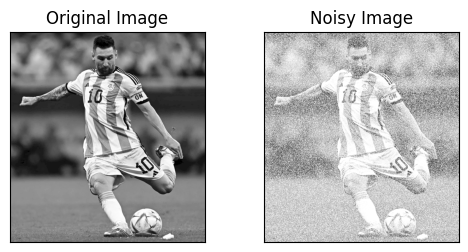

In [5]:
plt.figure(figsize=(6,6))
plt.subplot(221), plt.imshow(img1, cmap='gray')
plt.title('Original Image'), plt.xticks([]), plt.yticks([])
plt.subplot(222), plt.imshow(img2, cmap='gray')
plt.title('Noisy Image'), plt.xticks([]), plt.yticks([])
plt.show()

In [6]:
# Finding the abs difference between two pictures
s1 = cv2.absdiff(img1, img2)

In [7]:
# Convert to float to prevent overflow while squaring in the next step.
s1 = np.float32(s1)
s1 = s1 * s1

In [8]:
# Sum of all squared errors by summing up all the pixel values in s1
sse = s1.sum()

In [9]:
# return zero if the difference is extremely small
# below eq reads : (1e - 10)
if sse <= 1 * np.exp(1) - 10:
    print("Difference too small!")

MSE Formula being used:

![MSE Formula](images/mse_formula.png)

I1 and I2 are the original and degraded images respectively.

In [10]:
# if difference is not small, the MSE is obtained by dividing the SSE by the
# total number of pixels in the image. shape[0] * shape[1] * shape[2] gives the
# total number of pixels in the image.
shape = img1.shape

# Use mse = "1.0 * sse / (shape[0] * shape[1] * shape[2])" for rgb image
mse = 1.0 * sse / (shape[0] * shape[1])

PSNR formula being used:

<img src="images/psnr_formula.png" alt="PSNR Image" width="500"/>

L = Maximum intensity possible (256 in our case) <br>
We multiply by 10 to express the ratio in decibels. <br>
The higher the value, the less is noise able to affect the peak value in the image. <br>
So, better image quality.

In [11]:
# Here 255 denotes max possible value in a 8 bit channel
psnr = 10.0 * np.log10((255 * 255) / mse)

In [13]:
print(psnr, 'db')

7.942905836410874 db
